In [1]:
#from google.colab import drive
#drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
#%cd gdrive/My Drive/Master Thesis/DeepRL

/content/gdrive/My Drive/Master Thesis/DeepRL


In [3]:
#!ls -l

total 1119
drwx------ 3 root root   4096 Nov  8 12:06  agents
-rw------- 1 root root    422 Nov  8 13:24  Dockerfile
-rw------- 1 root root 521957 Nov 10 11:42  DQN_Cartpole.ipynb
-rw------- 1 root root 413921 Nov 10 12:19  DQN_Lunar_Lander.ipynb
drwx------ 3 root root   4096 Nov  8 12:06  DQN_trained_models
drwx------ 3 root root   4096 Nov  8 12:07  helpers
-rw------- 1 root root  14201 Nov 10 10:07  PG_Cartpole.ipynb
-rw------- 1 root root 168364 Nov 10 08:24  PG_Lunar_Lander.ipynb
drwx------ 2 root root   4096 Nov 10 08:32  PG_Trained_models
drwx------ 2 root root   4096 Nov 10 08:09  Presentations
-rw------- 1 root root     48 Nov  8 11:59  README.md
-rw------- 1 root root     25 Nov  8 13:24  requirements.txt
drwx------ 2 root root   4096 Nov 10 08:09 'Thesis Drafts'


In [4]:
#!apt-get update -y && apt-get install -y xvfb && apt-get install -y python-opengl && apt-get install -y cmake && apt-get install -y zlib1g zlib1g-dev

Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:3 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Ign:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [696 B]
Hit:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Hit:8 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:9 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Get:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:11 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ Packages [73.0 kB]
Hit:12 http://ppa.launchpad.net/cran/

In [5]:
#!pip install gym pyvirtualdisplay pyglet box2d-py atari_py pystan ipywidgets==7.6.5 jupyter_contrib_nbextensions

     |████████████████████████████████| 448 kB 5.0 MB/s 
     |████████████████████████████████| 20.9 MB 1.3 MB/s 
     |████████████████████████████████| 861 kB 57.5 MB/s 
     |████████████████████████████████| 479 kB 55.7 MB/s 
  Created wheel for jupyter-latex-envs: filename=jupyter_latex_envs-1.4.6-py2.py3-none-any.whl size=963415 sha256=0445ac83799a2d156039fb19b05102df2b72306a34b95ec140cadd83ac0a87eb
  Stored in directory: /root/.cache/pip/wheels/a0/95/26/4cf34fb92765c95fb7851fd447511594bcc3a50e504bd09af9
  Created wheel for jupyter-nbextensions-configurator: filename=jupyter_nbextensions_configurator-0.4.1-py2.py3-none-any.whl size=465842 sha256=2d406ee1dc541b54be3a7b69cd2630b383daa7a717433c73792f68701837030f
  Stored in directory: /root/.cache/pip/wheels/8d/c4/b5/e4b61f624036f83566580d61f24af7b73180b1361ee1ab3722
Successfully built jupyter-latex-envs jupyter-nbextensions-configurator


## Imports

In [1]:
from agents.DQN_Agent import DQN_Agent
from helpers.plot_util import *

2021-11-11 10:54:30.524415: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-11-11 10:54:30.524689: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


Create DQN_Agent

In [3]:
agent= DQN_Agent(
                 env_name='LunarLander-v2',
                 gamma=0.99,
                 epsilon=1.0,
                 layer1_size=128, 
                 layer2_size=64,    
                 lr=0.001, 
                 mem_size=1000000, 
                 batch_size=64,
                 epsilon_dec=0.0001,
                 epsilon_end=0.01,
                 reproduce_seed=None#42
                 )

# If you want to first train an agent use this cell ❎

/opt/conda/lib/python3.9/site-packages/keras/engine/training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,
2021-11-11 10:54:51.571386: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2021-11-11 10:54:51.571481: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2021-11-11 10:54:51.571528: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (53b99e672bb6): /proc/driver/nvidia/version does not exist
2021-11-11 10:54:51.572129: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the followin

Eps: 441 ,  Eps steps: 209 ,Epsilon: 0.01, Ep_Reward : 296.41 , Average_Reward : 211.25
Mean Reward over last 100 ep more than 300

 Agent trained.....

 Saving Model info.....

 LunarLander-v2 Problem took 441 episodes


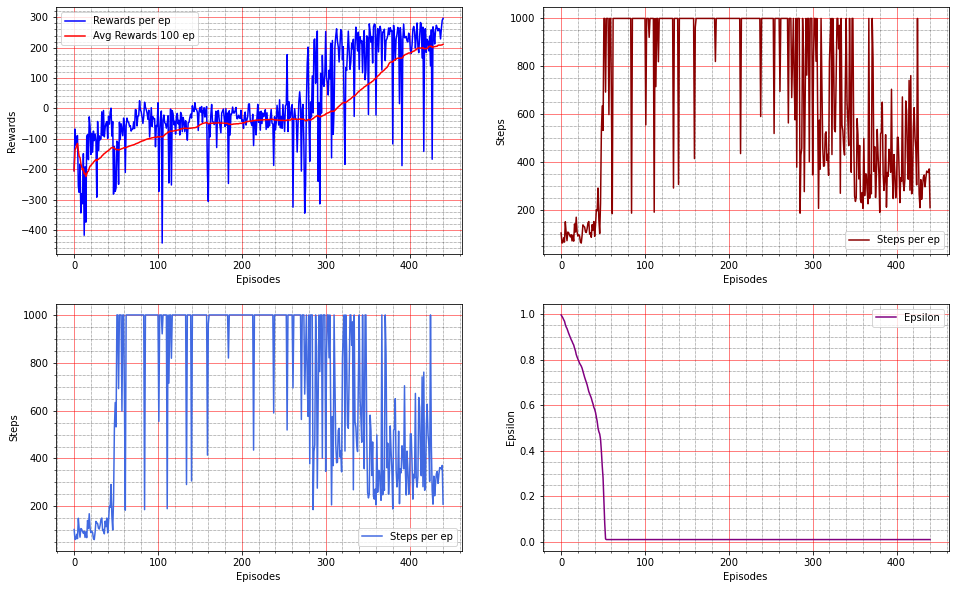

In [4]:
agent.train_multiple_episodes(num_episodes=500)    ## 500 was good hann tha toh acha kya kahte ho aap
model,book_keeping=agent.get_trained_model_info()
# plot Learning curve
learning_plot(book_keeping)

## Run this cell to check performance on 16 Test Cases

pyvirtualdisplay successfully imported
Tests # 42 , Rewards 270.7322573701548 , Steps 252
Tests # 900 , Rewards 258.9477193351082 , Steps 263
Tests # 930 , Rewards -91.96439356832371 , Steps 813
Tests # 180 , Rewards 252.16359635996747 , Steps 203
Tests # 660 , Rewards 258.41067882133325 , Steps 256
Tests # 240 , Rewards 251.18717348237482 , Steps 212
Tests # 960 , Rewards 301.78195775328584 , Steps 271
Tests # 450 , Rewards 10.786332481912055 , Steps 249
Tests # 30 , Rewards 260.07396355382457 , Steps 208
Tests # 90 , Rewards -28.134187360251534 , Steps 1000
Tests # 150 , Rewards 309.1675749163493 , Steps 224
Tests # 210 , Rewards 261.1919468210572 , Steps 206
Tests # 330 , Rewards 257.4683364981141 , Steps 288
Tests # 420 , Rewards 232.25799897174437 , Steps 192
Tests # 510 , Rewards 29.71776941045175 , Steps 244
Tests # 75 , Rewards 299.30414853420734 , Steps 245


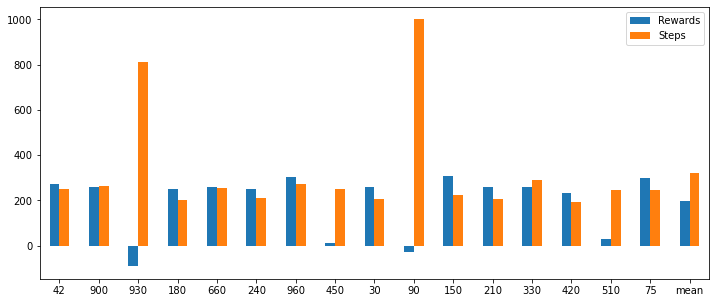

In [5]:
if agent.trained:
  test_cases_data,image_paths =agent.run_test_instances(case_list=[42,900,930,180,660,240,960,450,30,90,150,210,330,420,510,75], model_=model)
  # Plot Test cases data
  plot_test_cases(test_cases_data)

### Save the trained model manually

In [ ]:
agent.save_model()

DQN_trained_models/LunarLander-v2/dqn_model_20211107-181429.h5


# If you want to use a pretrained model use this cell ❎

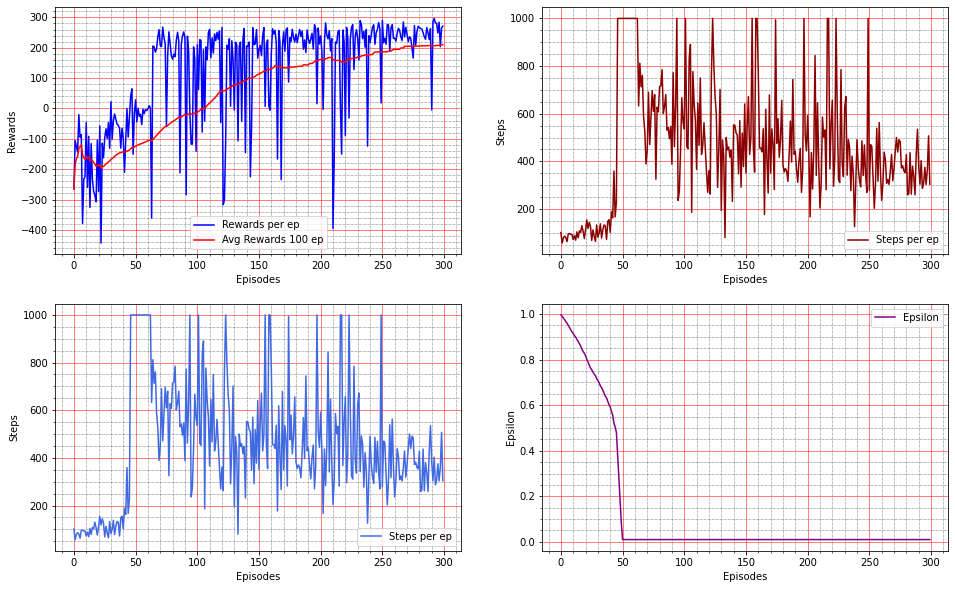

In [8]:
if not agent.trained:
  # some of the best models 20211108-090112 ,  20211108-194625 , 20211111-123337
  model_suffix="20211108-194625"
  model,book_keeping , image_paths = agent.load_pre_trained_model_info(timestr=model_suffix)
  # plot Learning curve
  learning_plot(book_keeping)

### Render the 16 Test Case gif's : ⏩

In [6]:
import IPython.display as display
import ipywidgets as widgets
from ipywidgets import GridspecLayout

rows=8
cols=4
grid = GridspecLayout(rows,cols)
index_of_img=0
for i in range(0,rows,2):
    for j in range(cols):
        
        path_of_img=image_paths[index_of_img]
        img=open(path_of_img,'rb').read()
        
        grid[i, j] = widgets.Image(value=img, format='gif', width=220, height=510)
        grid[i+1, j] = widgets.HTML(value=path_of_img[path_of_img.index('IMAGES/')+7 :])
        index_of_img+=1
        
        

grid

GridspecLayout(children=(Image(value=b'GIF89aX\x02\x90\x01\x83\x00\x00\x00\x00\x00\xcc\xcc\x0033ff3f3fffff33\x…

# Conclusions for DQN Agents

*   Agent doesnot generalize quite well to other instances of enviroment when we use reproducable seeds for libraries
*   Agent's learning is dependent on initial weights of the Model. 
*   We had to train the agent on different set of Model architectures and other set of hyperparameters in order to determine a workable one which could generalize well to other instances of the environment.   
*   Depedinig upon the enviroment specification Agent's learning performance may drop significatly after some episodes of training because of a phenomenon in neural networks called catastrophic forgetting




# Recommendations required ⚓

*   How to rearrange the DQN agents notebooks for results and analysis purposes ?
*   How should the minute details about the code in Thesis ? 
*   Use of Docker image since some libraries like gif rendering require libraries which are specific to OS kernel. 